To see which features are important, we will use weather data only from the San Diego Lindbergh Field weather station, which is assigned to the highest number of incidents and is at a central location, and all incident data. 

In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time

# Package to calculate distance between two coordinates
import geopy.distance

# Import supplementary visualization code visuals.py
import visuals as vs


# Suppress matplotlib user warnings
# Necessary for newer version of matplotlib
import warnings
warnings.filterwarnings("ignore")

# RandomForestRegressor, XGBoost and AdaboostRegressor algorithms
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor


# Import libraries for data visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import seaborn as sns
sns.set()

# Pretty display for notebooks
%matplotlib inline

In [4]:
# Load the location data of all weather stations analyzed
stations_analyzed=pd.read_csv('stations_analyzed.csv', header=0,index_col=0)
stations_analyzed

,stations,abbreviations,latitude,longitude
12,san_diego_lindbergh_field,KSAN,32.73361,-117.18306
14,san_diego_montgomery_field,KMYF,32.81444,-117.13639
13,san_diego_brown_field,KSDM,32.57528,-116.99306
11,ramona,KRNM,33.03750,-116.91583
0,carlsbad,KCRQ,33.12680,-117.27583


In [5]:
# Load weather data at san_diego_lindbergh_field weather station
sdlf=pd.read_csv('san_diego_lindbergh_field_engineered.csv',header=0)
# Load weather data at san_diego_montgomery_field weather station
sdmf=pd.read_csv('san_diego_montgomery_field_engineered.csv',header=0)
# Load weather data at san_diego_brown_field weather station
sdbf=pd.read_csv('san_diego_brown_field_engineered.csv',header=0)
# Load weather data at ramona weather station
ramona=pd.read_csv('ramona_engineered.csv',header=0)
# Load weather data at carlsbad weather station
carlsbad=pd.read_csv('carlsbad_engineered.csv',header=0)

In [5]:
# Load the data for all incidents
parse_dates = ['Response_Date']
incidents_sd=pd.read_csv('incidents_sd.csv', header=0, parse_dates=parse_dates)

# Create a column which contains only the date of the incident, not time of day 
incidents_sd['Response_Day'] = incidents_sd['Response_Date'].dt.date

# Group incidents by the date of the incident and get the number of incidents for each day
incidents_grouped=incidents_sd.groupby('Response_Day')['ID'].count()
incidents_grouped.index.freq = 'D'
incidents_grouped.to_csv('incidents_grouped.csv')

In [6]:
# Load dataset
parse_dates = ['Response_Date']
incidents_sdlf=pd.read_csv('incidents_sdlf.csv', header=0, parse_dates=parse_dates)
# Create a column which contains only the date of the incident, not time of day 
incidents_sdlf['Response_Day'] = incidents_sdlf['Response_Date'].dt.date
# Group incidents by the date of the incident and get the number of incidents for each day
incidents_sdlf_grouped=incidents_sdlf.groupby('Response_Day')['ID'].count()
incidents_sdlf_grouped.index.freq = 'D'
incidents_sdlf_grouped.to_csv('incidents_sdlf_grouped.csv')

# Load dataset
parse_dates = ['Response_Date']
incidents_sdmf=pd.read_csv('incidents_sdmf.csv', header=0, parse_dates=parse_dates)
# Create a column which contains only the date of the incident, not time of day 
incidents_sdmf['Response_Day'] = incidents_sdmf['Response_Date'].dt.date
# Group incidents by the date of the incident and get the number of incidents for each day
incidents_sdmf_grouped=incidents_sdmf.groupby('Response_Day')['ID'].count()
incidents_sdmf_grouped.index.freq = 'D'
incidents_sdmf_grouped.to_csv('incidents_sdmf_grouped.csv')

# Load dataset
parse_dates = ['Response_Date']
incidents_sdbf=pd.read_csv('incidents_sdbf.csv', header=0, parse_dates=parse_dates)
# Create a column which contains only the date of the incident, not time of day 
incidents_sdbf['Response_Day'] = incidents_sdbf['Response_Date'].dt.date
# Group incidents by the date of the incident and get the number of incidents for each day
incidents_sdbf_grouped=incidents_sdbf.groupby('Response_Day')['ID'].count()
incidents_sdbf_grouped.index.freq = 'D'
incidents_sdbf_grouped.to_csv('incidents_sdbf_grouped.csv')

# Load dataset
parse_dates = ['Response_Date']
incidents_ramona=pd.read_csv('incidents_ramona.csv', header=0, parse_dates=parse_dates)
# Create a column which contains only the date of the incident, not time of day 
incidents_ramona['Response_Day'] = incidents_ramona['Response_Date'].dt.date
# Group incidents by the date of the incident and get the number of incidents for each day
incidents_ramona_grouped=incidents_ramona.groupby('Response_Day')['ID'].count()
incidents_ramona_grouped.index.freq = 'D'
incidents_ramona_grouped.to_csv('incidents_ramona_grouped.csv')

# Load dataset
parse_dates = ['Response_Date']
incidents_carlsbad=pd.read_csv('incidents_carlsbad.csv', header=0, parse_dates=parse_dates)
# Create a column which contains only the date of the incident, not time of day 
incidents_carlsbad['Response_Day'] = incidents_carlsbad['Response_Date'].dt.date
# Group incidents by the date of the incident and get the number of incidents for each day
incidents_carlsbad_grouped_initial=incidents_carlsbad.groupby('Response_Day')['ID'].count()
incidents_carlsbad_grouped_initial.index.freq = 'D'
# Create a series of size (1095,) which contains only zeros as values
incidents_carlsbad_zeros=pd.Series([0 for x in range(len(incidents_ramona_grouped))],index=incidents_ramona_grouped.index, name='ID')
# Create the final grouped dataframe for carlsbad where if no incidents happened that date, includes zero as the value
incidents_carlsbad_grouped=incidents_carlsbad_grouped_initial.combine(incidents_carlsbad_zeros, max, fill_value=0)
incidents_carlsbad_grouped.to_csv('incidents_carlsbad_grouped.csv')

In [7]:
# Slice and save the incidents where the assigned station is #12: san_diego_lindbergh_field
incidents_sdlf=incidents_sd[incidents_sd['assigned_station']==12]
incidents_sdlf.to_csv('incidents_sdlf.csv',index=False)
# Slice and save the incidents where the assigned station is #14: san_diego_montgomery_field
incidents_sdmf=incidents_sd[incidents_sd['assigned_station']==14]
incidents_sdmf.to_csv('incidents_sdmf.csv',index=False)
# Slice and save the incidents where the assigned station is #13: san_diego_brown_field
incidents_sdbf=incidents_sd[incidents_sd['assigned_station']==13]
incidents_sdbf.to_csv('incidents_sdbf.csv',index=False)
# Slice and save the incidents where the assigned station is #11: ramona
incidents_ramona=incidents_sd[incidents_sd['assigned_station']==11]
incidents_ramona.to_csv('incidents_ramona.csv',index=False)
# Slice and save the incidents where the assigned station is #0: carlsbad
incidents_carlsbad=incidents_sd[incidents_sd['assigned_station']==0]
incidents_carlsbad.to_csv('incidents_carlsbad.csv',index=False)

In [8]:
# Just keep the columns with weather data in them as an input to the model
sdlf_input=sdlf.iloc[:,1:]
sdmf_input=sdmf.iloc[:,1:]
sdbf_input=sdbf.iloc[:,1:]
ramona_input=ramona.iloc[:,1:]
carlsbad_input=carlsbad.iloc[:,1:]

In [9]:
# Define a function for a heatmap of correlations among all numeric features
def correlation_matrix(dataset):
    numeric_columns=dataset.select_dtypes(include=['int','float']).columns.values.tolist()
    fig, ax = plt.subplots(figsize=(11,10))     
    sns.heatmap(dataset[numeric_columns].corr(),cmap='viridis_r', annot=True, ax=ax)
    fig.tight_layout()
    fig.show() 

In [10]:
# Define a function to calculate the feature importances of features given a model and feature importances of that model
def feature_plot(model, importances, X, num_features):
    # Display the features in the order of importance
    indices = np.argsort(importances)[:num_features]
    columns = X.columns.values[indices[:]]
    values = importances[indices][:]

    # Define the colors for the plot
    base_color1 = sns.color_palette()[0]

    # Create the plot
    fig = plt.figure(figsize = (8,6))
    plt.title("Feature Importances ({})".format(model.__class__.__name__), fontsize = 16)
    plt.barh(np.arange(num_features), values, align="center", color = base_color1)
    plt.yticks(np.arange(num_features), columns, fontsize = 14)
    plt.xlabel("Normalized Weight", fontsize = 14, fontweight='bold')
    plt.ylabel("Features", fontsize = 14, fontweight='bold')
    plt.tight_layout()
    plt.show()  

Now we will check if there is any unusual ranking in the feature importances which would warrant using another weather-related feature for the analysis of 

## 1. Feature Importances for San Diego Lindbergh Field:

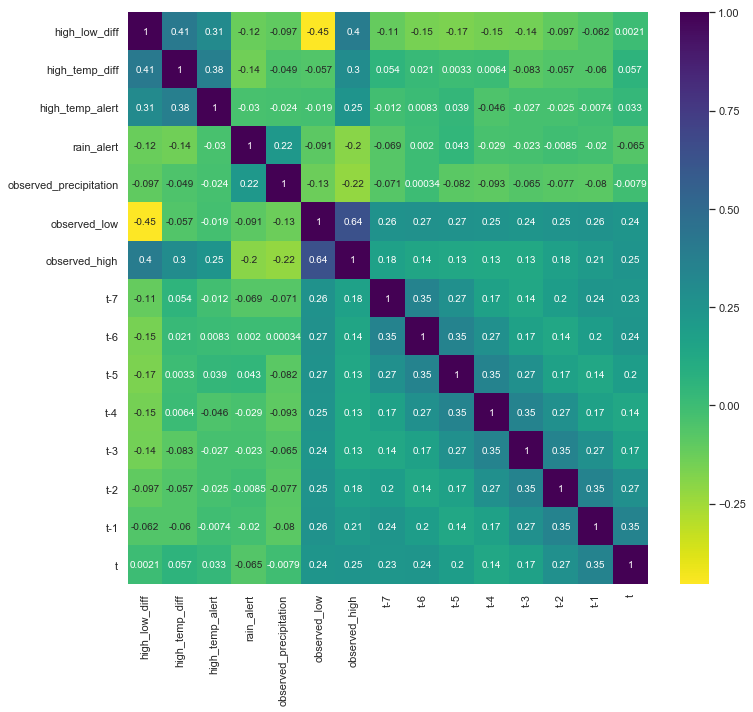

In [12]:
# Create a dataframe with the number of incidents up to 7 days ago and all weather-related features
series=pd.Series(incidents_sdlf_grouped.values)
df_lags = pd.DataFrame()
for i in range(7,0,-1):
    df_lags['t-'+str(i)] = series.shift(i)
df_lags['t'] = series.values
input_output_sdlf=pd.concat([sdlf_input, df_lags], axis=1)
# Remove the first 7 rows of the data which contain nan values
input_output_sdlf = input_output_sdlf.iloc[7:]
# Save to new file
input_output_sdlf.to_csv('all_features_7_time_lags_sdlf.csv', index=False)

# Draw the correlation matrix with seven days of number of incidents and all weather-related features
correlation_matrix(input_output_sdlf)

"observed_high" and "observed_low" seem to be still the most correlated features with the target variable "t".

[08:50:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


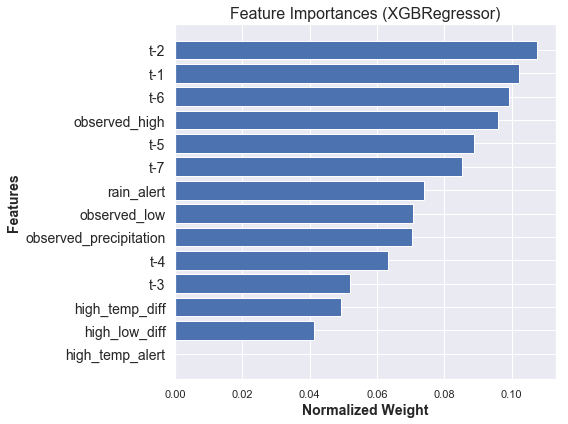

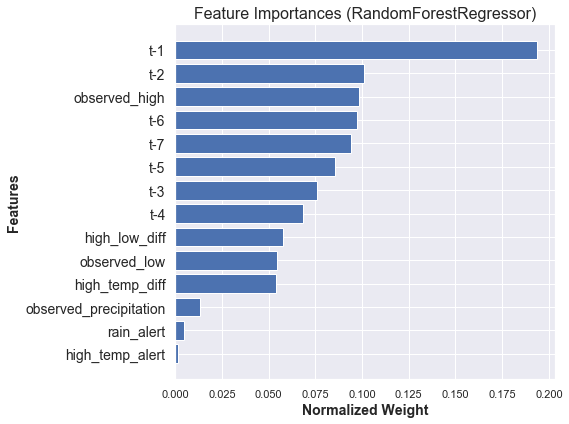

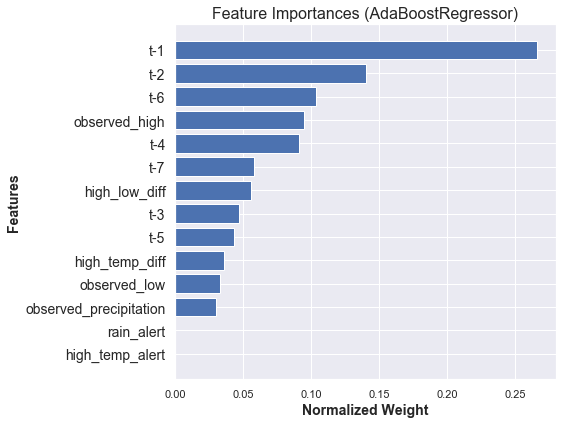

In [13]:
# Run RandomForestRegressor, XGBoostRegressor and AdaboostRegressor
# and use the feature importance methods of these models to rank the features

# Split the input_output dataframe into features (weather-related features and time lags t-1 thorugh t-7) and target (t)
X = input_output_sdlf.iloc[:,0:-1]
y = input_output_sdlf.iloc[:,-1]

# Train the supervised models 
model1 = xgb.XGBRegressor(random_state=0)
model1.fit(X, y)
model2=RandomForestRegressor(random_state=0)
model2.fit(X, y)
model3=AdaBoostRegressor(random_state=0)
model3.fit(X, y)

for model in [model1, model2, model3]:
    # Extract the feature importances using .feature_importances_ 
    importances = model.feature_importances_ 
    # Plot feature importances for all features
    feature_plot(model, importances, X, num_features=X.shape[1])

"observed_high" still is the most important weather-related features in all three models.

## 2. Feature Importances for San Diego Montgomery Field:

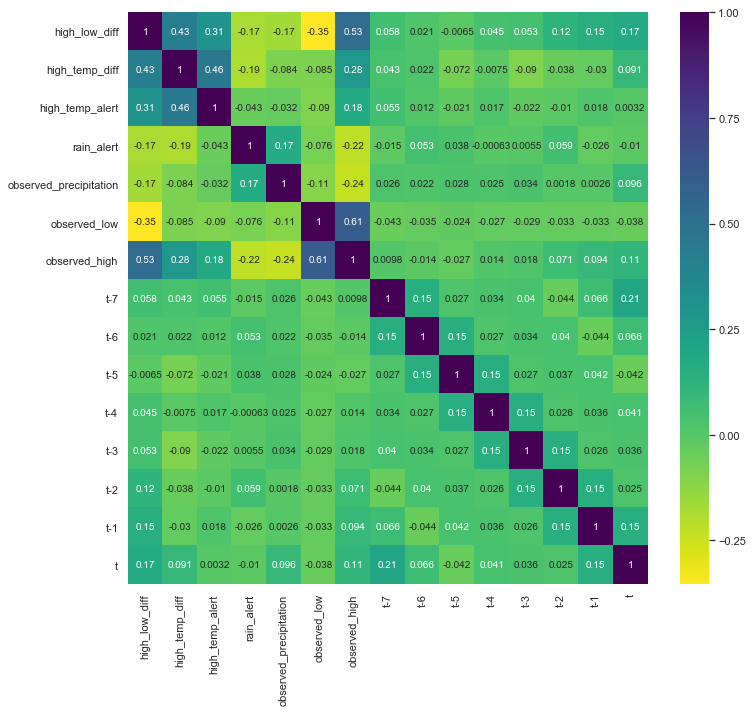

In [26]:
# Create a dataframe with the number of incidents up to 7 days ago and all weather-related features
series=pd.Series(incidents_sdmf_grouped.values)
df_lags = pd.DataFrame()
for i in range(7,0,-1):
    df_lags['t-'+str(i)] = series.shift(i)
df_lags['t'] = series.values
input_output_sdmf=pd.concat([sdmf_input, df_lags], axis=1)
# Remove the first 7 rows of the data which contain nan values
input_output_sdmf = input_output_sdmf.iloc[7:]
# Save to new file
input_output_sdmf.to_csv('all_features_7_time_lags_sdmf.csv', index=False)

# Draw the correlation matrix with seven days of number of incidents and all weather-related features
correlation_matrix(input_output_sdmf)

"high_low_diff", which is the difference between "observed_high" and "observed_low" temperatures seem to be the most correlated weather-related feature with the target variable "t".

[07:25:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


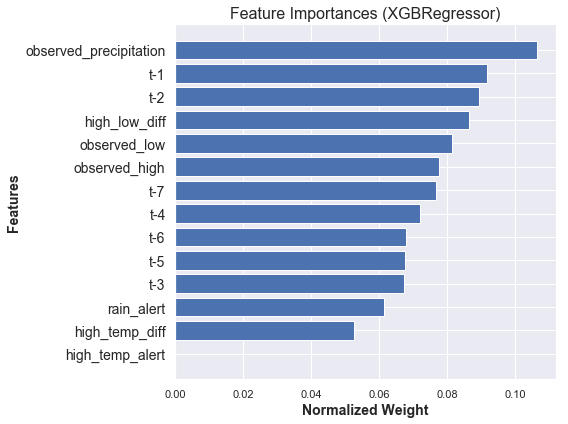

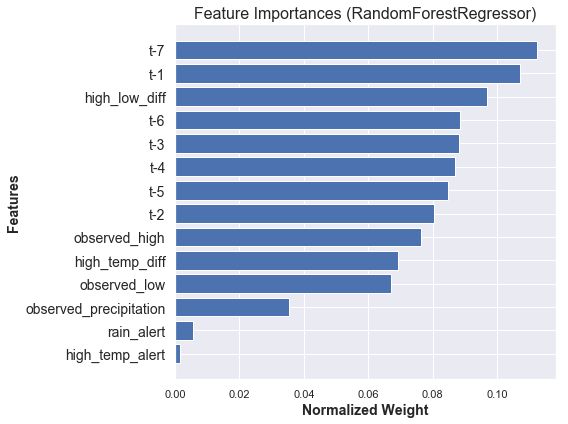

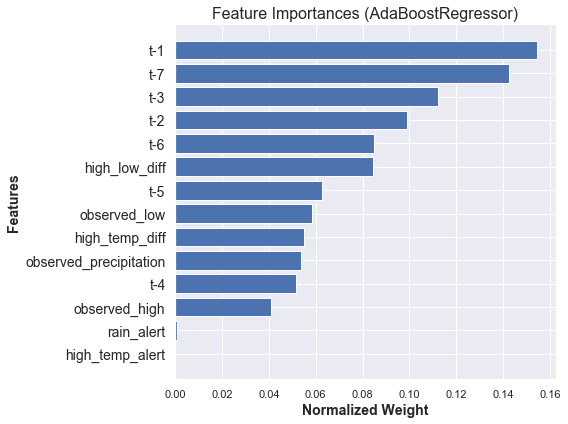

In [27]:
# Run RandomForestRegressor, XGBoostRegressor and AdaboostRegressor
# and use the feature importance methods of these models to rank the features

# Split the input_output dataframe into features (weather-related features and time lags t-1 thorugh t-7) and target (t)
X = input_output_sdmf.iloc[:,0:-1]
y = input_output_sdmf.iloc[:,-1]

# Train the supervised models 
model1 = xgb.XGBRegressor(random_state=0)
model1.fit(X, y)
model2=RandomForestRegressor(random_state=0)
model2.fit(X, y)
model3=AdaBoostRegressor(random_state=0)
model3.fit(X, y)

for model in [model1, model2, model3]:
    # Extract the feature importances using .feature_importances_ 
    importances = model.feature_importances_ 
    # Plot feature importances for all features
    feature_plot(model, importances, X, num_features=X.shape[1])

As "high_low_diff" has the most correlation with the target variable and is the most important weather-related feature in two of the three models above. We will use "high_low_diff" for this data set.

## 3. Feature Importances for San Diego Brown Field:

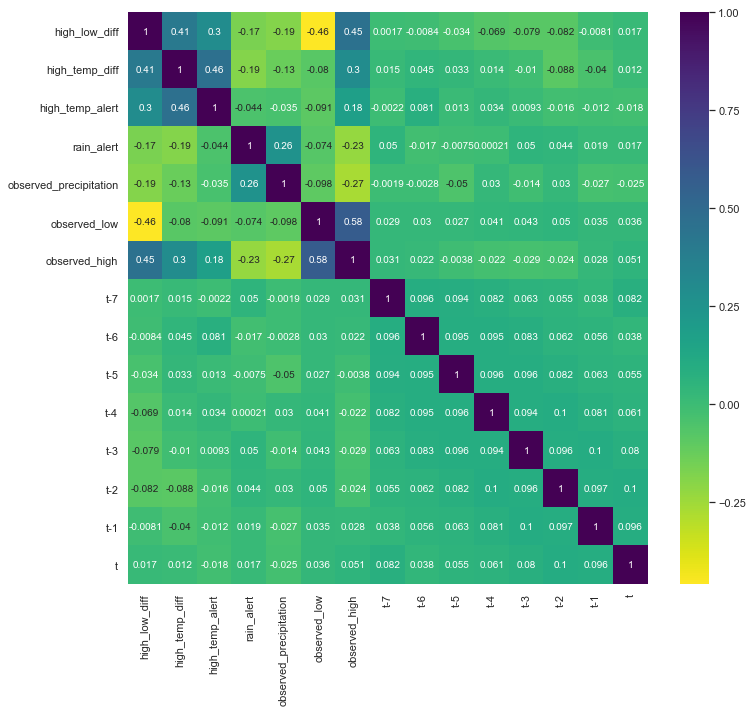

In [28]:
# Create a dataframe with the number of incidents up to 7 days ago and all weather-related features
series=pd.Series(incidents_sdbf_grouped.values)
df_lags = pd.DataFrame()
for i in range(7,0,-1):
    df_lags['t-'+str(i)] = series.shift(i)
df_lags['t'] = series.values
input_output_sdbf=pd.concat([sdbf_input, df_lags], axis=1)
# Remove the first 7 rows of the data which contain nan values
input_output_sdbf = input_output_sdbf.iloc[7:]
# Save to new file
input_output_sdbf.to_csv('all_features_7_time_lags_sdbf.csv', index=False)

# Draw the correlation matrix with seven days of number of incidents and all weather-related features
correlation_matrix(input_output_sdbf)

None of the weather-related features seem to have a significant correlation with the target variable "t".

[07:31:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


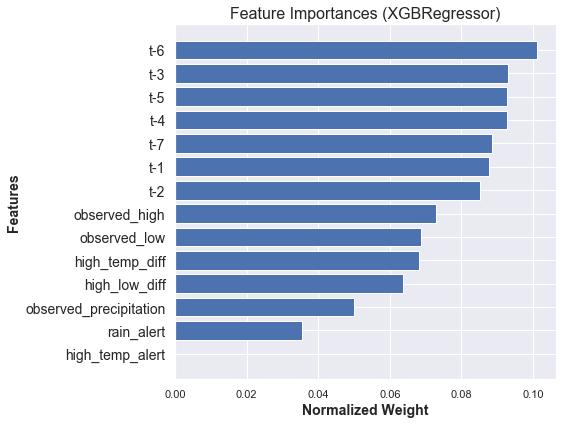

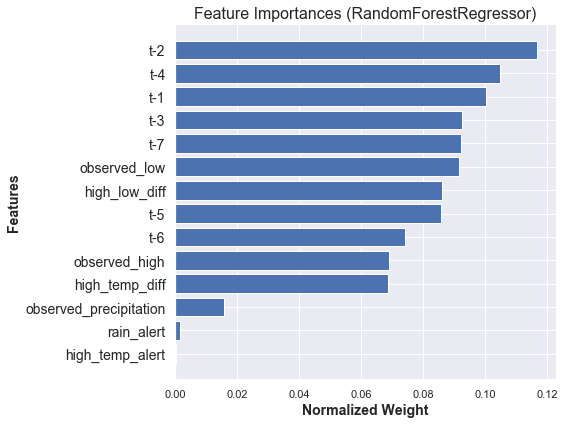

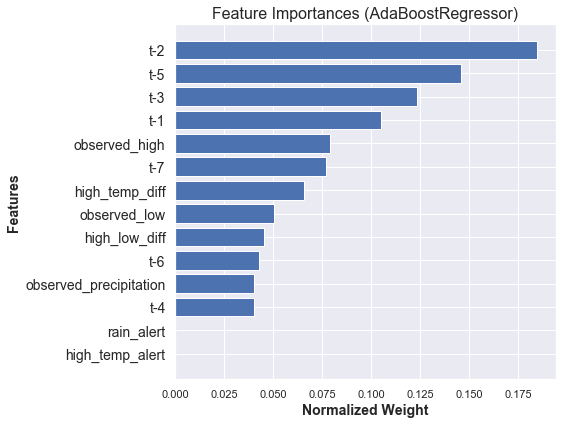

In [29]:
# Run RandomForestRegressor, XGBoostRegressor and AdaboostRegressor
# and use the feature importance methods of these models to rank the features

# Split the input_output dataframe into features (weather-related features and time lags t-1 thorugh t-7) and target (t)
X = input_output_sdbf.iloc[:,0:-1]
y = input_output_sdbf.iloc[:,-1]

# Train the supervised models 
model1 = xgb.XGBRegressor(random_state=0)
model1.fit(X, y)
model2=RandomForestRegressor(random_state=0)
model2.fit(X, y)
model3=AdaBoostRegressor(random_state=0)
model3.fit(X, y)

for model in [model1, model2, model3]:
    # Extract the feature importances using .feature_importances_ 
    importances = model.feature_importances_ 
    # Plot feature importances for all features
    feature_plot(model, importances, X, num_features=X.shape[1])

"observed_high" seems to have the highest ranking among weather-related features in two of the three models and has the most correlation with the target variable so we choose "observed_high" to use as the weather-related feature for this data set.

## 4. Feature Importances for Ramona:

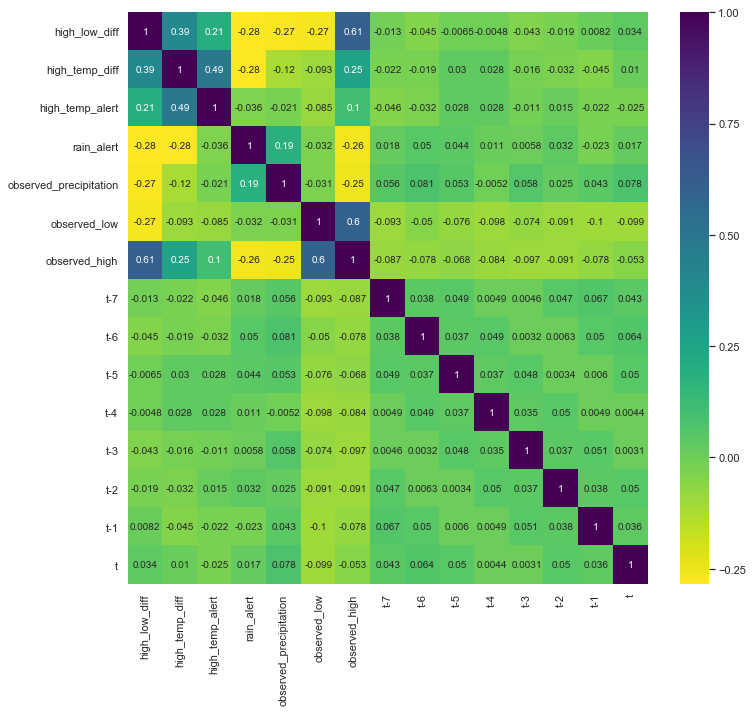

In [32]:
# Create a dataframe with the number of incidents up to 7 days ago and all weather-related features
series=pd.Series(incidents_ramona_grouped.values)
df_lags = pd.DataFrame()
for i in range(7,0,-1):
    df_lags['t-'+str(i)] = series.shift(i)
df_lags['t'] = series.values
input_output_ramona=pd.concat([ramona_input, df_lags], axis=1)
# Remove the first 7 rows of the data which contain nan values
input_output_ramona = input_output_ramona.iloc[7:]
# Save to new file
input_output_ramona.to_csv('all_features_7_time_lags_ramona.csv', index=False)

# Draw the correlation matrix with seven days of number of incidents and all weather-related features
correlation_matrix(input_output_ramona)

There seems to be no significant correlation between weather-related data and the target variable.

[07:59:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


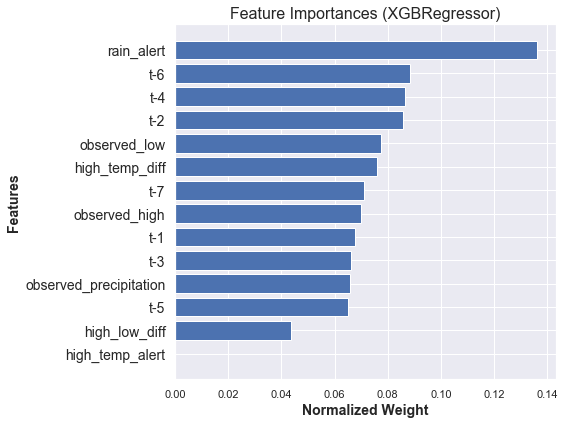

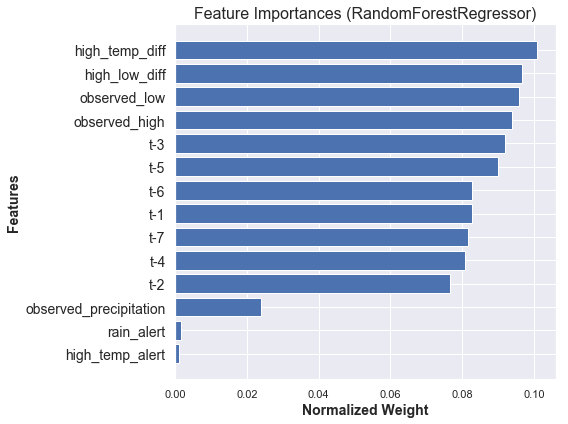

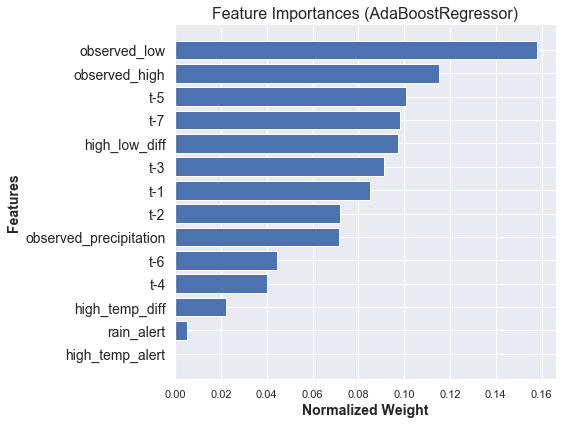

In [33]:
# Run RandomForestRegressor, XGBoostRegressor and AdaboostRegressor
# and use the feature importance methods of these models to rank the features

# Split the input_output dataframe into features (weather-related features and time lags t-1 thorugh t-7) and target (t)
X = input_output_ramona.iloc[:,0:-1]
y = input_output_ramona.iloc[:,-1]

# Train the supervised models 
model1 = xgb.XGBRegressor(random_state=0)
model1.fit(X, y)
model2=RandomForestRegressor(random_state=0)
model2.fit(X, y)
model3=AdaBoostRegressor(random_state=0)
model3.fit(X, y)

for model in [model1, model2, model3]:
    # Extract the feature importances using .feature_importances_ 
    importances = model.feature_importances_ 
    # Plot feature importances for all features
    feature_plot(model, importances, X, num_features=X.shape[1])

As there is no significant correlation between the weather-related features and the target variable, there is no consensus among the models which weather-related feature is important. We will use "observed_high" as it seems to show the most correlation with the target variable and ranks reasonably high in the above models.

## 5. Feature Importances for Carlsbad:

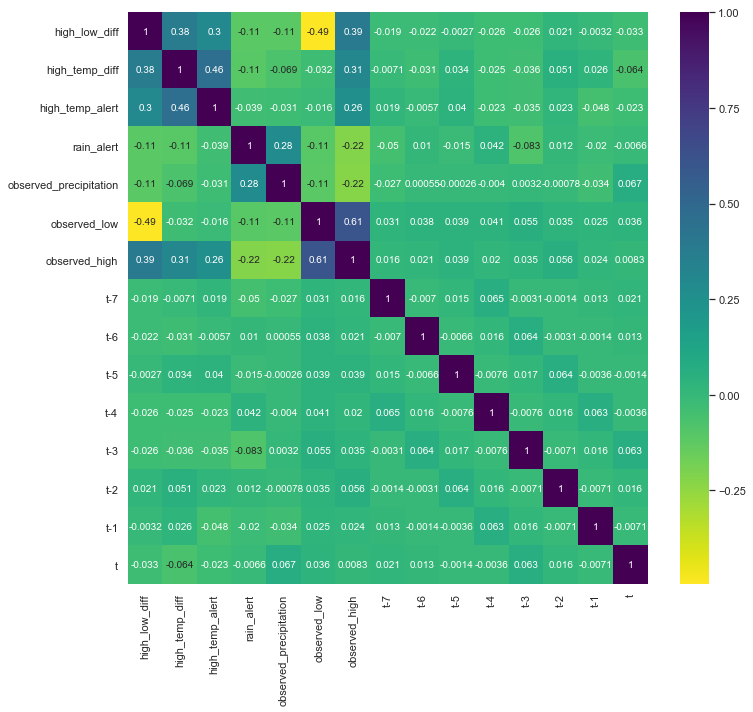

In [34]:
# Create a dataframe with the number of incidents up to 7 days ago and all weather-related features
series=pd.Series(incidents_carlsbad_grouped.values)
df_lags = pd.DataFrame()
for i in range(7,0,-1):
    df_lags['t-'+str(i)] = series.shift(i)
df_lags['t'] = series.values
input_output_carlsbad=pd.concat([carlsbad_input, df_lags], axis=1)
# Remove the first 7 rows of the data which contain nan values
input_output_carlsbad = input_output_carlsbad.iloc[7:]
# Save to new file
input_output_carlsbad.to_csv('all_features_7_time_lags_carlsbad.csv', index=False)

# Draw the correlation matrix with seven days of number of incidents and all weather-related features
correlation_matrix(input_output_carlsbad)

There seems to be no significant correlation between weather-related data and the target variable.

[08:12:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


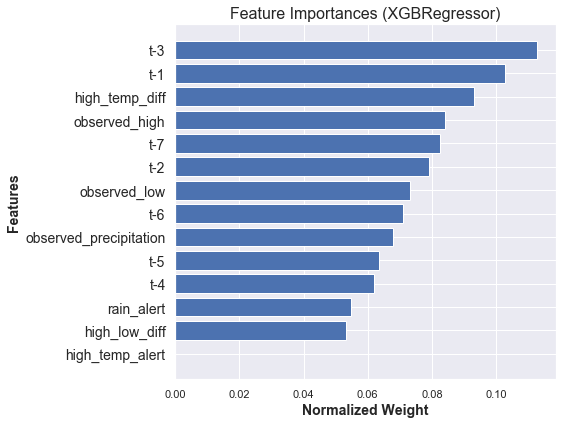

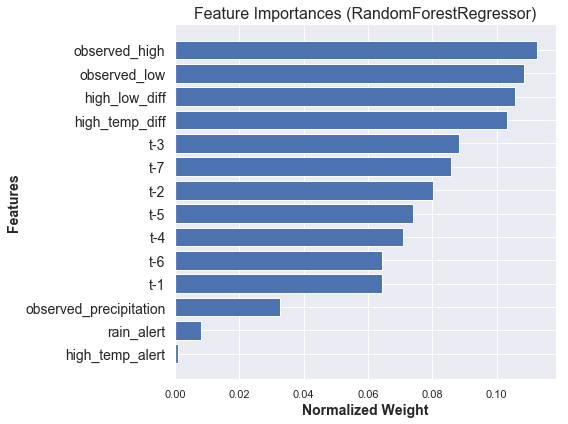

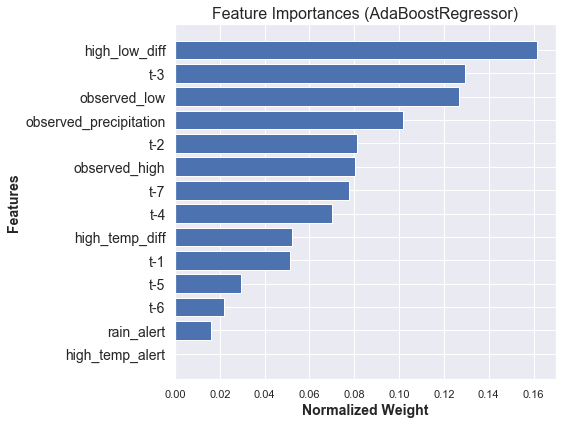

In [35]:
# Run RandomForestRegressor, XGBoostRegressor and AdaboostRegressor
# and use the feature importance methods of these models to rank the features

# Split the input_output dataframe into features (weather-related features and time lags t-1 thorugh t-7) and target (t)
X = input_output_carlsbad.iloc[:,0:-1]
y = input_output_carlsbad.iloc[:,-1]

# Train the supervised models 
model1 = xgb.XGBRegressor(random_state=0)
model1.fit(X, y)
model2=RandomForestRegressor(random_state=0)
model2.fit(X, y)
model3=AdaBoostRegressor(random_state=0)
model3.fit(X, y)

for model in [model1, model2, model3]:
    # Extract the feature importances using .feature_importances_ 
    importances = model.feature_importances_ 
    # Plot feature importances for all features
    feature_plot(model, importances, X, num_features=X.shape[1])

As there is no significant correlation between the weather-related features and the target variable, there is no consensus among the models which weather-related feature is important. We will use "high_temp_diff" as it seems to show relatively high correlation with the target variable and ranks reasonably high in the above models.

In [ ]:
# Save the observed high temperature data as a csv file
sdlf['observed_high'].to_csv('sdlf_weather_feature.csv',index=False)
# Save the observed high_low_diff temperature data as a csv file
sdmf['high_low_diff'].to_csv('sdmf_weather_feature.csv',index=False)
# Save the observed high temperature data as a csv file
sdbf['observed_high'].to_csv('sdbf_weather_feature.csv',index=False)
# Save the observed high temperature data as a csv file
ramona['observed_high'].to_csv('ramona_weather_feature.csv',index=False)

In [8]:
# Save the observed high temperature data as a csv file
# The first row of this variable includes nan by definition
# Replace it by zero, then save
carlsbad['high_temp_diff'].iloc[0]=0
carlsbad['high_temp_diff'].to_csv('carlsbad_weather_feature.csv',index=False)